### 食物分类案例，学习tf多分类方法

In [1]:
import tensorflow as tf

In [2]:
# sklearn circles example
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [3]:
# visualize it!because I don't understand
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# check out the different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

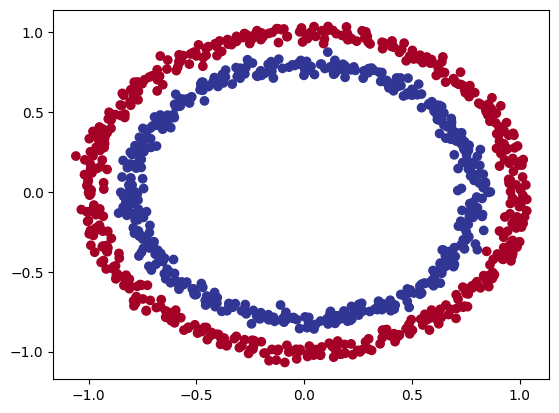

In [5]:
# so it is a binary classification problem
# visualize
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
# c=y表示用y进行颜色映射，cmap是颜色映射为红黄蓝颜色

### 输入和输出数据的shape很重要

In [6]:
# check the shapes of features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### 建模过程
1. 建模或者选择模型，通过keras建造自己的模型，或者引入一个迁移模型
2. 编辑模型，主要是定义模型的损失函数，优化器，以及评价方法
3. 训练模型，fit数据
* 数据处理需要是合适的形态

In [9]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=['accuracy']
)

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 601us/step - loss: 5.0500 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 503us/step - loss: 4.7328 - accuracy: 0.4640
Epoch 3/5
32/32 [==============================] - 0s 462us/step - loss: 4.3304 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 494us/step - loss: 2.9592 - accuracy: 0.4820
Epoch 5/5
32/32 [==============================] - 0s 486us/step - loss: 0.7465 - accuracy: 0.4940


### 模型提升是一个重要课题

In [10]:
# what if train it longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 438us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

* 提高训练的数量并不能很好的提升模型性能，尝试增加层数

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=['accuracy']
)

model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 470us/step - loss: 0.6937 - accuracy: 0.5000


[0.6937322020530701, 0.5]

* 即使增加层数也不能提升
* 其他调节方法
  1. 增加隐藏层和神经元
  2. 改善优化器比如Adam
  3. 调节学习率
  4. 更长时间的训练

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=['accuracy']
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 478us/step - loss: 0.6971 - accuracy: 0.5030


[0.6971296668052673, 0.503000020980835]

* Still bad!!
* 这个时候怎么办呢，可视化！！找到问题！

In [14]:
# create a function to visualize the predictions
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions using the model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # Reshape predictions to get ready
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 349us/step
doing binary classification...


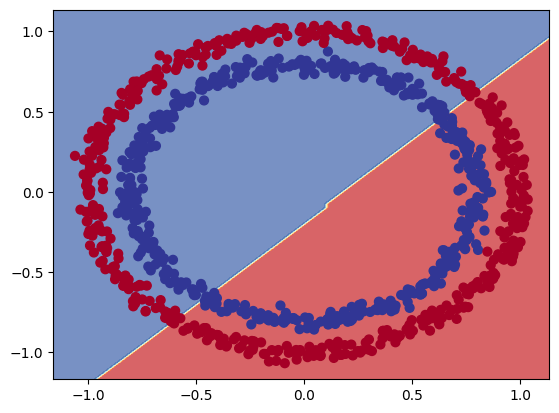

In [15]:
# Check out the predictions my model is making
plot_decision_boundary(model_3, X, y)

* 似乎模型尝试画一条直线，但是实际数据并不是这样。
* model3似乎是一个回归模型，尝试一下它是不是：

In [17]:
# random一个回归模型来尝试fitmodel3
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# 需要修改loss函数，因为原来的模型是一个分类问题
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 195.0003 - mae: 195.0003
Epoch 2/100
5/5 [==============================] - 0s 868us/step - loss: 69.3038 - mae: 69.3038
Epoch 3/100
5/5 [==============================] - 0s 874us/step - loss: 67.9649 - mae: 67.9649
Epoch 4/100
5/5 [==============================] - 0s 799us/step - loss: 61.1538 - mae: 61.1538
Epoch 5/100
5/5 [==============================] - 0s 883us/step - loss: 45.3646 - mae: 45.3646
Epoch 6/100
5/5 [==============================] - 0s 864us/step - loss: 45.5556 - mae: 45.5556
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 45.4750 - mae: 45.4750
Epoch 8/100
5/5 [==============================] - 0s 977us/step - loss: 43.1739 - mae: 43.1739
Epoch 9/100
5/5 [==============================] - 0s 882us/step - loss: 43.2537 - mae: 43.2537
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 41.7028 - mae: 41.7028
Epoch 11/100
5/5 [=========================

2/2 [==============================] - 0s 1ms/step


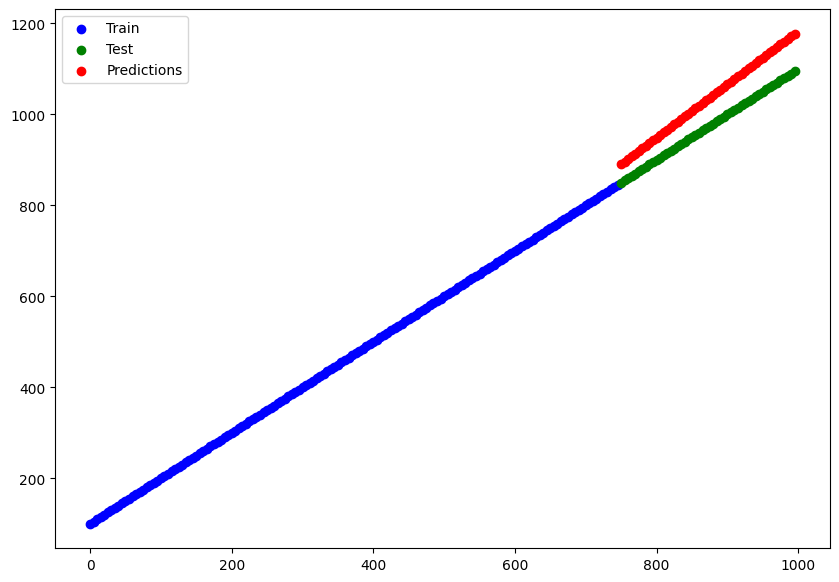

In [18]:
# visualize the predictions
# Make predictions
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Train')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

* 这个模型确实是一个可以解决回归问题的模型
* 所以作为分类模型它的问题是什么？？
* **模型的线性和非线性**ReLU

* 概念清扫：
激活函数（Activation Function）和优化函数（Optimization Function）是神经网络中两个不同的概念。

1. **激活函数：** 激活函数是神经网络中的一种数学操作，通常应用在神经元的输出上。激活函数的作用是引入非线性性质，使得神经网络能够学习复杂的映射关系。常见的激活函数包括 Sigmoid、ReLU（Rectified Linear Unit）、Tanh 等。激活函数将神经元的输入转换为输出，传递到网络的下一层。

   示例代码：

   ```python
   from tensorflow.keras.layers import Dense, Activation
   model.add(Dense(128, input_dim=10))
   model.add(Activation('relu'))
   ```

   在这个例子中，`'relu'` 就是激活函数，应用在 `Dense` 层的输出上。

2. **优化函数：** 优化函数是在神经网络的训练过程中使用的一种算法，用于调整模型的权重和参数，以最小化（或最大化）某个定义的损失函数。优化函数的目标是找到损失函数的全局最小值或局部最小值，使得模型能够更好地拟合训练数据。

   示例代码：

   ```python
   from tensorflow.keras.optimizers import Adam
   model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
   ```

   在这个例子中，`Adam` 就是优化函数，被应用在 `compile` 阶段，用于最小化模型的均方误差损失。

总结：激活函数和优化函数是神经网络中不同层次的概念，激活函数主要与神经元的输出相关，而优化函数主要涉及模型的训练过程。

In [20]:
# Use ReLu
# Set random seed
tf.random.set_seed(42)

# Create the model with non-linear activation:model_4 set to linear works worse
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=["accuracy"]
)

# Fit the model
history = model_5.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 563us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

* 还是不行啊哥哥！！
* 增加激活函数层,降低学习率：有时候人需要学习的慢一点，机器也是

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model with non-linear activation:model_4 set to linear works worse
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
    metrics=["accuracy"]
)

# Fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 484us/step - loss: 0.6650 - accuracy: 0.5970


[0.6650446653366089, 0.597000002861023]

* 怎么肥事！！

313/313 [==============================] - 0s 354us/step
doing binary classification...


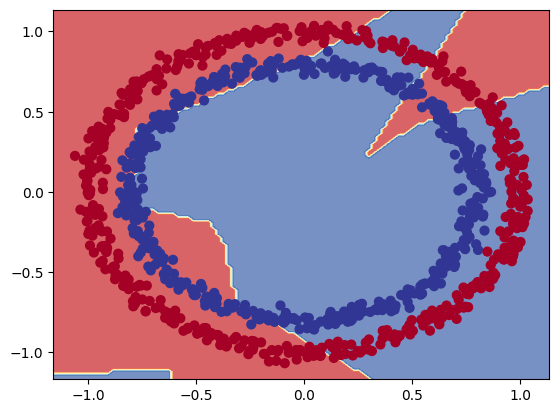

In [22]:
# visualize it!
plot_decision_boundary(model_6, X, y)

* 看起来它有努力，继续改变激励函数

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 542us/step - loss: 0.3193 - accuracy: 0.9850


[0.31931349635124207, 0.9850000143051147]

313/313 [==============================] - 0s 351us/step
doing binary classification...


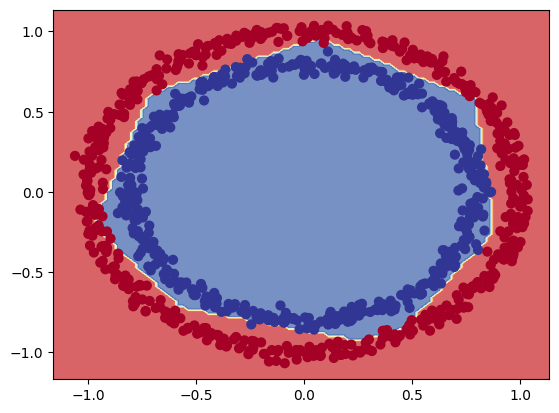

In [24]:
# visualize!
plot_decision_boundary(model_7, X, y)

* 哥哥它起作用了！！
* 果然激励函数才是王道！！激励！！

### 研究一下激励函数，Linear，Sigmoid，Relu

In [26]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

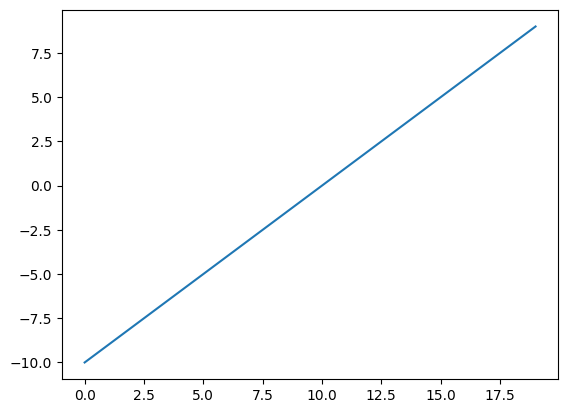

In [27]:
# visualize
plt.plot(A);

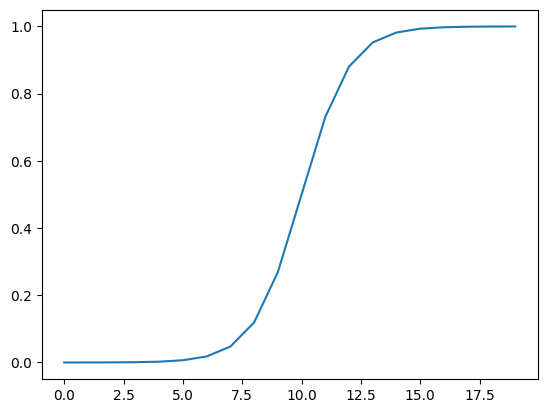

In [28]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Plot it 
plt.plot(sigmoid(A));

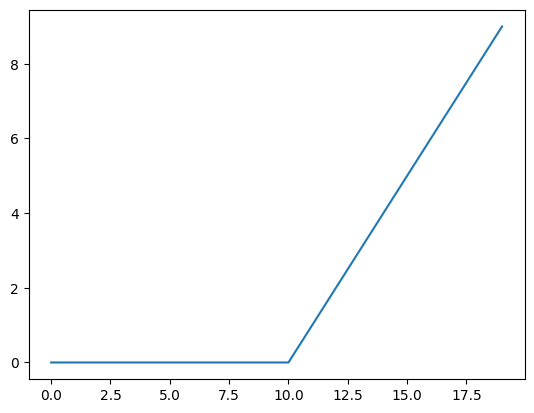

In [29]:
# ReLu
def relu(x):
    return tf.maximum(0, x)

# Plot it 
plt.plot(relu(A));

In [30]:
# tensorflow linear activation funciton
tf.keras.activations.linear(A) == A

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

* 其他的一些激励函数cheatsheet：https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#

* 激活函数的引入主要是为了引入非线性变换，使得神经网络能够学习和表示复杂的非线性关系。如果没有激活函数，多层神经网络就会失去其非线性表示的能力，从而降为线性模型。

为什么：

1. **线性变换的叠加仍然是线性的：** 如果没有激活函数，多层神经网络的输出就是输入的线性组合，无论有多少层，整个网络仍然只能表示线性变换。多个线性层的叠加结果仍然是线性的，无法捕捉到非线性模式。

2. **引入非线性性质：** 激活函数引入了非线性变换，通过激活函数的非线性特性，神经网络可以学习和表示更加复杂的非线性映射。这使得神经网络能够逼近任意复杂的函数，包括那些非线性关系较强的问题。

举例说明：

考虑一个简单的场景，假设没有激活函数，神经网络的输出为 `y = Wx + b`，其中 `W` 是权重，`x` 是输入，`b` 是偏置。无论有多少层，整个网络仍然只是在进行线性变换，不能捕捉到非线性模式。而引入激活函数后，例如 ReLU，输出就变成了 `y = max(0, Wx + b)`，这个非线性操作使得网络能够学习到更加复杂的函数映射。

综上所述，激活函数的引入使神经网络具备了表达和学习非线性关系的能力，从而使其更适用于解决复杂的非线性问题。

### 数据集分割也非常重要！

In [31]:
# See how many examples are in the toy dataset
len(X)

1000

In [32]:
# split it into train and test data sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# check the shape
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [34]:
# train on the train sets
tf.random.set_seed(42)

# Create the model as model_7
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25, verbose=0)

# Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 719us/step - loss: 0.1247 - accuracy: 0.9750


[0.12468651682138443, 0.9750000238418579]

* Adam的默认学习率是0.001，这里提高的了学习率，其实可以减少epochs因为它会学习的很快，学习太多可能会过拟合
* 注意到激励函数的写法也和模型7不一样，但是他们的效果是一样的

313/313 [==============================] - 0s 346us/step
doing binary classification...
313/313 [==============================] - 0s 335us/step
doing binary classification...


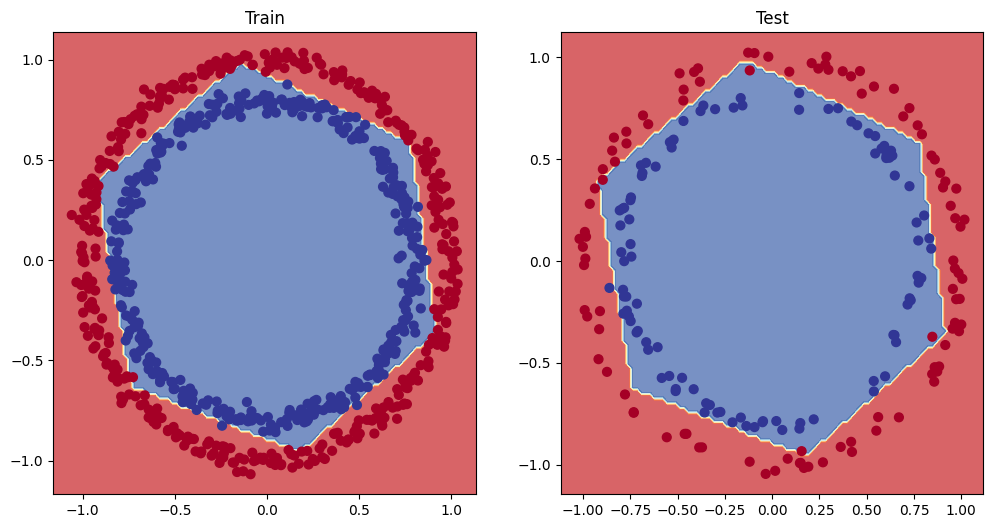

In [35]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### 损失曲线history

In [36]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693417,0.49875
1,0.688040,0.54000
2,0.684695,0.51875
3,0.678401,0.56625
4,0.666256,0.64375
5,0.651522,0.59375
6,0.630906,0.69125
7,0.611157,0.69750
8,0.589308,0.69625
9,0.559829,0.71750


Text(0.5, 1.0, 'Model_8 training curves')

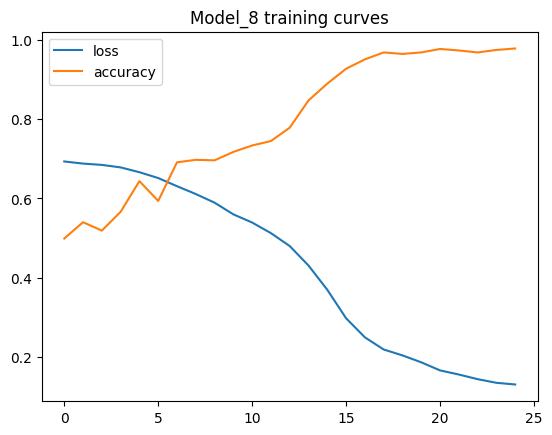

In [38]:
# plot
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

### 学习率：learning rate callback

在机器学习中，学习率（learning rate）是一个重要的超参数，它决定了模型在每次参数更新中所走的步长。`LearningRateScheduler` 是 Keras 中的一个回调函数，用于动态调整学习率。

`LearningRateScheduler` 的作用是在训练过程中根据一定的规则调整学习率。这可以帮助模型更好地收敛，避免在训练过程中学习率过大导致的震荡或学习率过小导致的收敛缓慢。

以下是使用 `LearningRateScheduler` 的一个简单示例：

```python
from keras.callbacks import LearningRateScheduler
import keras.backend as K

# 定义学习率调度函数
def lr_schedule(epoch):
    """返回学习率，这里可以根据需要定义不同的学习率变化规则。"""
    lr = 0.1
    if epoch > 50:
        lr = 0.01
    if epoch > 100:
        lr = 0.001
    return lr

# 创建学习率调度器
learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# 在模型训练中使用学习率调度器
model.fit(x_train, y_train, epochs=150, callbacks=[learning_rate_scheduler])
```

在上述示例中，`lr_schedule` 函数根据训练的 epoch 数返回相应的学习率。在模型的训练过程中，`LearningRateScheduler` 会在每个 epoch 结束时调用 `lr_schedule` 函数，从而动态地调整学习率。

这种学习率调度的方法允许在训练过程中根据模型的性能调整学习率，从而提高训练的效果。

In [48]:
# Set random seed
tf.random.set_seed(42)

# Create a model same as model_8
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Create a learning rate scheduler callback 1e-4 is 0.0001
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20)
)

# Fit the model by passing the lr_scheduler callback
history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

# Evaluate the model
model_9.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 0s 645us/step - loss: 0.7069 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 560us/step - loss: 0.7065 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 558us/step - loss: 0.7061 - accuracy: 0.4975 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 591us/step - loss: 0.7056 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 523us/step - loss: 0.7052 - accuracy: 0.4975 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 534us/step - loss: 0.7048 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 542us/step - loss: 0.7042 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 902us/step - loss: 0.7037 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

[0.693448007106781, 0.4950000047683716]

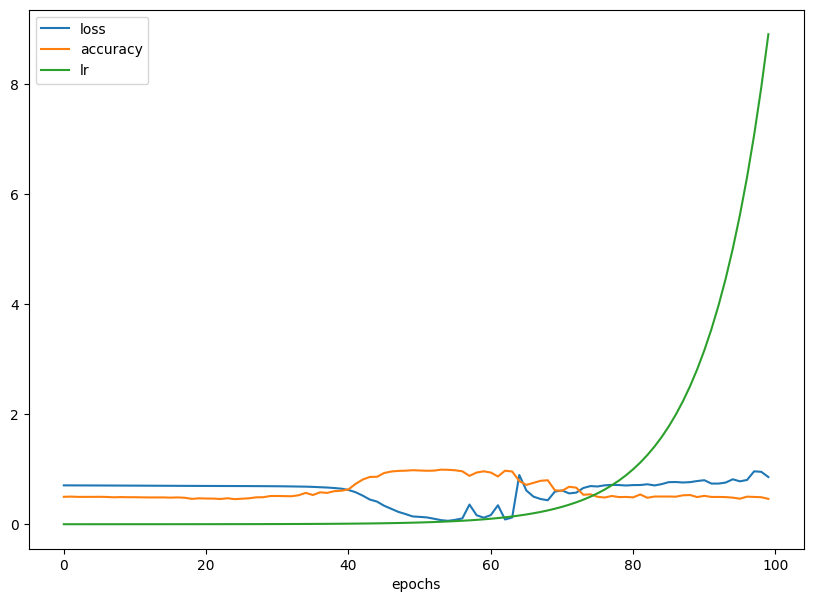

In [49]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs loss')

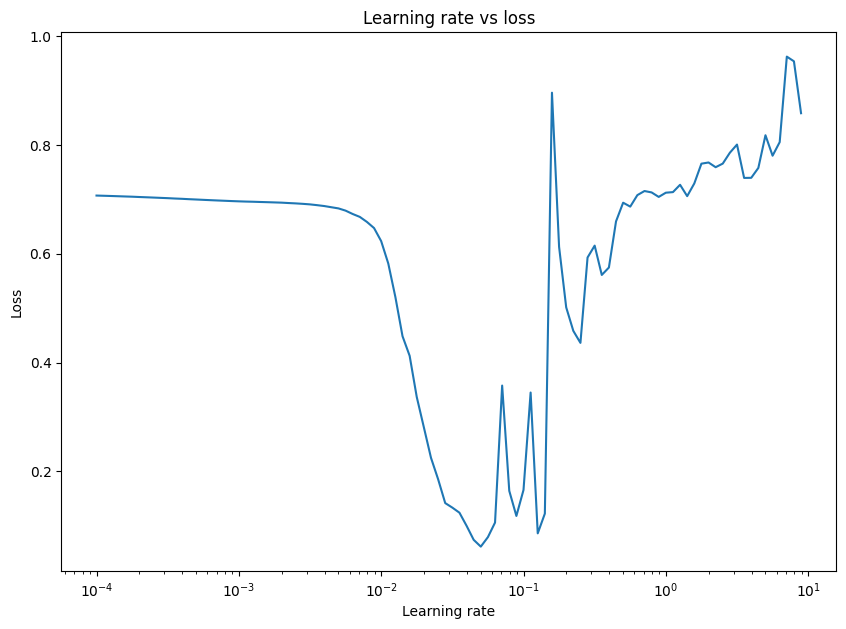

In [52]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

* 理想的学习率，是比最低点loss更小10倍的地方，loss曲线仍在下降，即将触底但是尚未的地方
* 所以Adam的默认学习率0.001其实是一个很好lr，我们设置的0.01也可以

In [54]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 10**-4 # 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
# use an ideal learning rate like 0.02 to fit a model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

# Evaluate model
model_10.evaluate(X_test, y_test)

Epoch 1/20
25/25 [==============================] - 0s 688us/step - loss: 0.6887 - accuracy: 0.5325
Epoch 2/20
25/25 [==============================] - 0s 556us/step - loss: 0.6799 - accuracy: 0.5412
Epoch 3/20
25/25 [==============================] - 0s 523us/step - loss: 0.6620 - accuracy: 0.6000
Epoch 4/20
25/25 [==============================] - 0s 514us/step - loss: 0.6300 - accuracy: 0.6712
Epoch 5/20
25/25 [==============================] - 0s 527us/step - loss: 0.5944 - accuracy: 0.6675
Epoch 6/20
25/25 [==============================] - 0s 550us/step - loss: 0.5393 - accuracy: 0.7763
Epoch 7/20
25/25 [==============================] - 0s 527us/step - loss: 0.4969 - accuracy: 0.7725
Epoch 8/20
25/25 [==============================] - 0s 518us/step - loss: 0.4588 - accuracy: 0.8012
Epoch 9/20
25/25 [==============================] - 0s 523us/step - loss: 0.4193 - accuracy: 0.8300
Epoch 10/20
25/25 [==============================] - 0s 531us/step - loss: 0.3935 - accuracy: 0.8325

[0.07631328701972961, 0.9900000095367432]

313/313 [==============================] - 0s 348us/step
doing binary classification...
313/313 [==============================] - 0s 330us/step
doing binary classification...


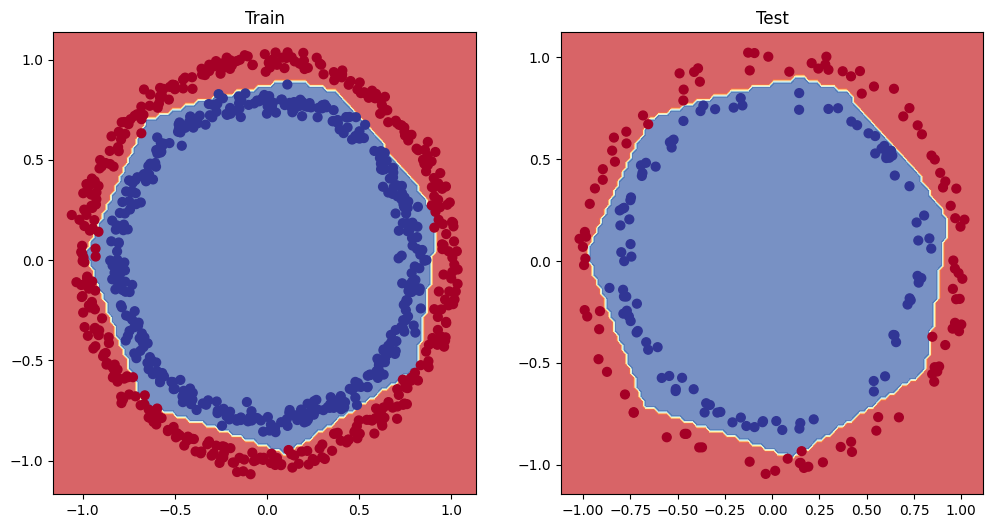

In [57]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### 模型评估方法

1. Accuracy:sklearn.metrics.accuracy_score() or tf.keras.metrics.Accuracy()
2. Precision:sklearn.metrics.precision_score() or tf.keras.metrics.Precision()
3. Recall:sklearn.metrics.recall_score() or tf.keras.metrics.Recall()
4. F1-score:sklearn.metrics.f1_score()
5. Confusion matrix:Custom function or sklearn.metrics.plot_confusion_matrix()
6. Classification report:sklearn.metrics.classification_report()

In [59]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 890us/step - loss: 0.0763 - accuracy: 0.9900


In [60]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 616us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

* 好像格式不对，check一下

In [61]:
y_preds[:10]

array([[9.0584499e-01],
       [9.4509774e-01],
       [9.4509774e-01],
       [9.4509774e-01],
       [8.5810088e-02],
       [2.1583906e-01],
       [9.3248194e-01],
       [2.2392733e-04],
       [9.4509774e-01],
       [2.4758480e-03]], dtype=float32)

In [62]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [63]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [65]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

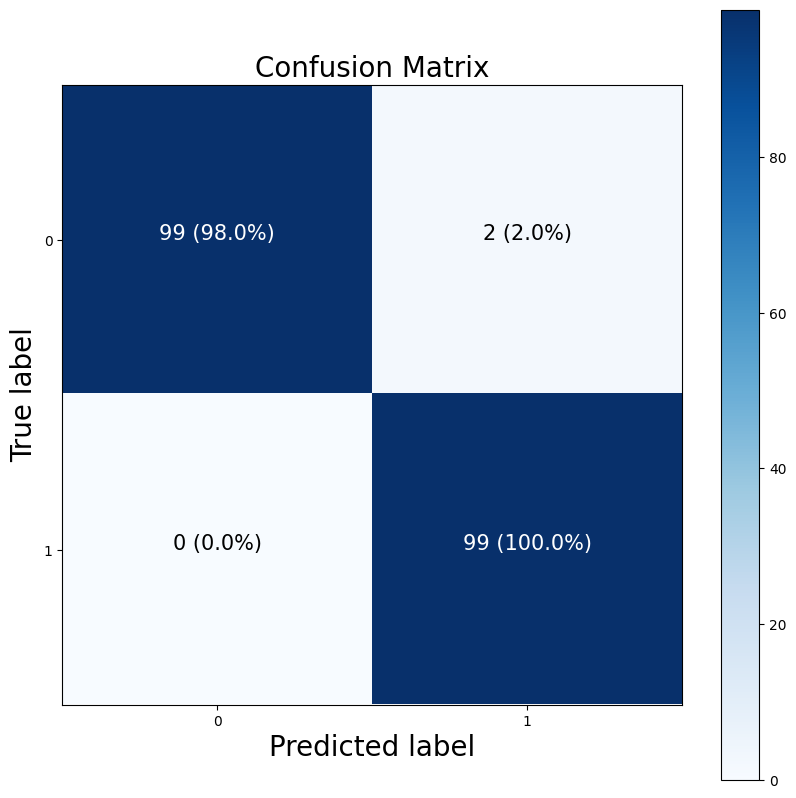

In [70]:
# The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize
n_classes = cm.shape[0] # 2

# prettify it 
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
# 使用 `matshow` 函数在轴上显示矩阵。`cm` 是混淆矩阵的数据，
# 而 `cmap=plt.cm.Blues` 指定了使用蓝色调色板进行颜色映射。
# 这将混淆矩阵的值映射到蓝色的不同强度。
# `fig.colorbar(cax)`：在图形上添加一个颜色条，用于解释矩阵中颜色的含义。
# 颜色条显示了数值与颜色之间的映射关系，帮助理解混淆矩阵的各个元素代表的含义。

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix", 
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

### 一个更大的分类案例：多分类数据

In [72]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [74]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [75]:
train_labels[0]

9

In [76]:
# Check shape
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

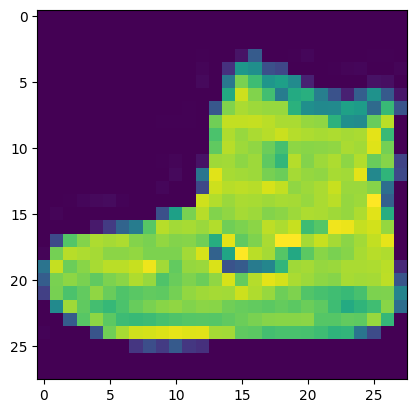

In [77]:
# Visualize the data
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

data set info: https://github.com/zalandoresearch/fashion-mnist#labels

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

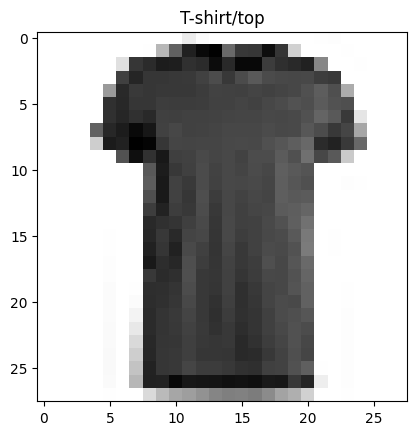

In [79]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

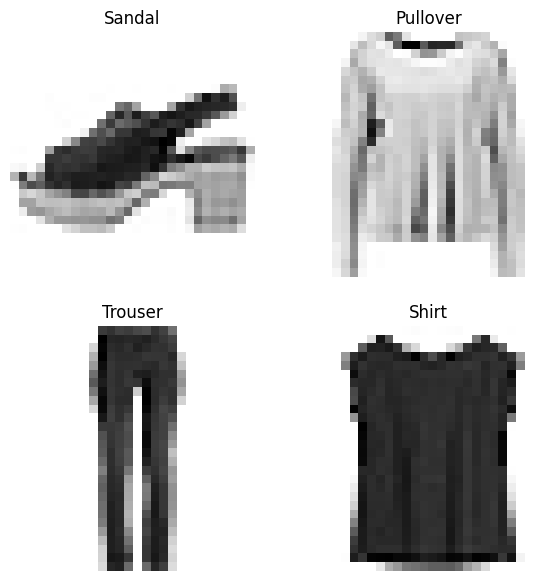

In [82]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [84]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 617us/step - loss: 2.3252 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 559us/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 1s 571us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 1s 559us/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 1s 560us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 1s 564us/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 1s 575us/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 -

In [86]:
# Check the shapes of the model
model_11.summary()  # None is batch size

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 数据缩放和正规化Scaling and Normalization

In [87]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [88]:
# Divide train and test images by the maximum value
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check again
train_data.min(), train_data.max()

(0.0, 1.0)

In [89]:
# modeling again
# set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# Fit the model
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 643us/step - loss: 1.3836 - accuracy: 0.4919 - val_loss: 1.0064 - val_accuracy: 0.6662
Epoch 2/10
1875/1875 [==============================] - 1s 568us/step - loss: 0.7796 - accuracy: 0.7330 - val_loss: 0.7034 - val_accuracy: 0.7506
Epoch 3/10
1875/1875 [==============================] - 1s 564us/step - loss: 0.6500 - accuracy: 0.7661 - val_loss: 0.6568 - val_accuracy: 0.7710
Epoch 4/10
1875/1875 [==============================] - 1s 552us/step - loss: 0.6070 - accuracy: 0.7870 - val_loss: 0.6198 - val_accuracy: 0.7872
Epoch 5/10
1875/1875 [==============================] - 1s 569us/step - loss: 0.5859 - accuracy: 0.7953 - val_loss: 0.6090 - val_accuracy: 0.7857
Epoch 6/10
1875/1875 [==============================] - 1s 548us/step - loss: 0.5718 - accuracy: 0.8002 - val_loss: 0.6144 - val_accuracy: 0.7842
Epoch 7/10
1875/1875 [==============================] - 1s 581us/step - loss: 0.5639 - accuracy: 0.8033 - val_loss: 0.6191 -

* SparseCategoricalCrossentropy()在标签是integer的时候适用
* CategoricalCrossentropy()的标签必须是one-hot
* Flatten将数据降维

<Axes: title={'center': 'Normalized Data'}>

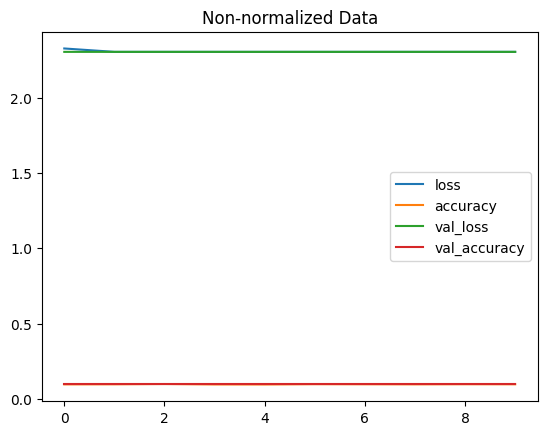

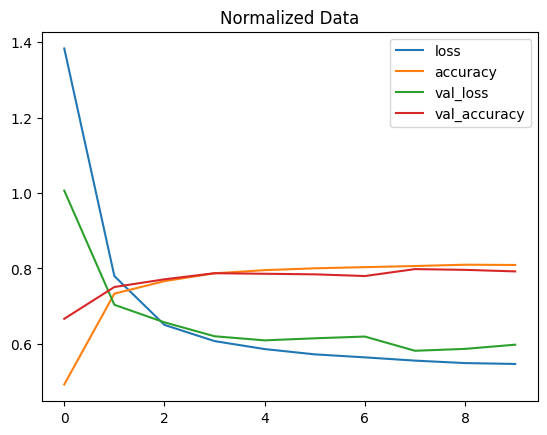

In [90]:
# Plot them 
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

* 即使是相同的模型，数据是否正规化会对模型训练结果有重要的影响！

### 找到理想的学习率

In [92]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=["accuracy"]
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch/10)
)

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 1s 628us/step - loss: 1.8508 - accuracy: 0.3900 - val_loss: 1.6132 - val_accuracy: 0.4916 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 1s 556us/step - loss: 1.3875 - accuracy: 0.5711 - val_loss: 1.2237 - val_accuracy: 0.6103 - lr: 1.2589e-04
Epoch 3/40
1875/1875 [==============================] - 1s 564us/step - loss: 1.0877 - accuracy: 0.6353 - val_loss: 1.0081 - val_accuracy: 0.6570 - lr: 1.5849e-04
Epoch 4/40
1875/1875 [==============================] - 1s 551us/step - loss: 0.9262 - accuracy: 0.6963 - val_loss: 0.8828 - val_accuracy: 0.7162 - lr: 1.9953e-04
Epoch 5/40
1875/1875 [==============================] - 1s 554us/step - loss: 0.8191 - accuracy: 0.7401 - val_loss: 0.7924 - val_accuracy: 0.7466 - lr: 2.5119e-04
Epoch 6/40
1875/1875 [==============================] - 1s 548us/step - loss: 0.7409 - accuracy: 0.7613 - val_loss: 0.7328 - val_accuracy: 0.7630 - lr: 3.1623e-04
Epoch 7/40
1875/1875 [

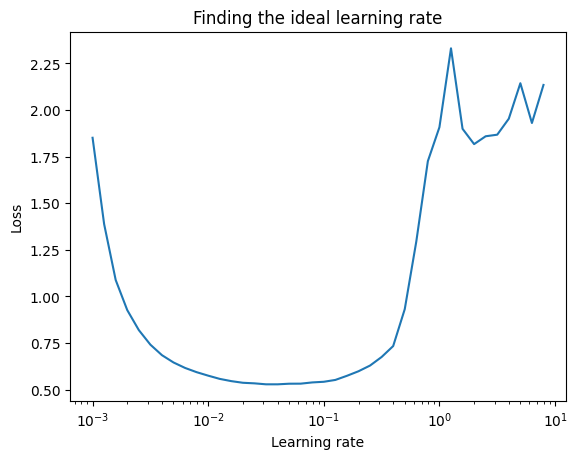

In [94]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/10))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [95]:
# use the lr by 0.001

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 627us/step - loss: 1.2922 - accuracy: 0.5147 - val_loss: 0.9335 - val_accuracy: 0.6764
Epoch 2/20
1875/1875 [==============================] - 1s 585us/step - loss: 0.8293 - accuracy: 0.6952 - val_loss: 0.7845 - val_accuracy: 0.7046
Epoch 3/20
1875/1875 [==============================] - 1s 572us/step - loss: 0.7275 - accuracy: 0.7190 - val_loss: 0.7061 - val_accuracy: 0.7304
Epoch 4/20
1875/1875 [==============================] - 1s 571us/step - loss: 0.6518 - accuracy: 0.7422 - val_loss: 0.6624 - val_accuracy: 0.7376
Epoch 5/20
1875/1875 [==============================] - 1s 551us/step - loss: 0.6227 - accuracy: 0.7517 - val_loss: 0.6412 - val_accuracy: 0.7624
Epoch 6/20
1875/1875 [==============================] - 1s 560us/step - loss: 0.5989 - accuracy: 0.7724 - val_loss: 0.6166 - val_accuracy: 0.7641
Epoch 7/20
1875/1875 [==============================] - 1s 565us/step - loss: 0.5824 - accuracy: 0.7809 - val_loss: 0.6077 -

### 接下来做什么？？
* 进行模型评估
* 进行一些预测，然后可视化看看
* 提高模型精度，更长的训练时间或者不同的模型构架
* 保存或者投入应用
* 进行不同的尝试

In [96]:
# 混淆矩阵，模型评估函数
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes), # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels, # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [97]:
# Make some predictions
y_probs = model_14.predict(test_data)
y_probs[:5]

313/313 [==============================] - 0s 374us/step


array([[4.7408986e-12, 1.3232762e-17, 1.0832738e-17, 4.2539461e-05,
        8.6931828e-07, 1.7005801e-01, 1.2410241e-15, 5.8714248e-02,
        2.4382109e-07, 7.7118403e-01],
       [3.6939410e-03, 8.2225073e-05, 3.8312900e-01, 7.0656831e-03,
        5.2301145e-01, 2.1577266e-03, 7.9278015e-02, 5.3251424e-04,
        8.5734279e-04, 1.9217106e-04],
       [5.9026986e-04, 9.9901450e-01, 4.5473961e-08, 3.9349264e-04,
        3.2316747e-11, 1.4743274e-13, 1.7538231e-06, 1.9441597e-14,
        2.2735442e-09, 4.2296878e-17],
       [5.5059395e-04, 9.9519819e-01, 4.3931450e-09, 4.2500068e-03,
        9.3667872e-11, 3.3639297e-13, 1.2124416e-06, 2.0657795e-13,
        5.4622391e-09, 3.9117612e-15],
       [1.6531718e-01, 6.9161258e-03, 4.4121012e-01, 2.8859148e-02,
        1.0045526e-02, 5.5969624e-05, 3.4576643e-01, 7.5502016e-06,
        1.8218689e-03, 4.5688584e-08]], dtype=float32)

In [98]:
# find the highest value use argmax()
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [99]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 4, 1, 1, 2, 1, 4, 6, 5, 7])

In [100]:
# Check the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[793,   8,  42,  79,   5,   0,  65,   0,   8,   0],
       [  9, 930,   8,  42,   4,   0,   7,   0,   0,   0],
       [ 23,   0, 658,  11, 257,   0,  51,   0,   0,   0],
       [ 22,  19,  25, 851,  48,   0,  31,   0,   3,   1],
       [  1,   0, 123,  35, 773,   0,  66,   0,   2,   0],
       [  0,   0,   0,   3,   2, 923,   0,  35,   4,  33],
       [181,   7, 158,  57, 216,   0, 363,   0,  18,   0],
       [  0,   0,   0,   0,   0,  43,   0, 903,   2,  52],
       [  3,   0,   8,  11,   5,   3,  67,   8, 895,   0],
       [  0,   0,   0,   2,   3,  11,   0,  32,   1, 951]])

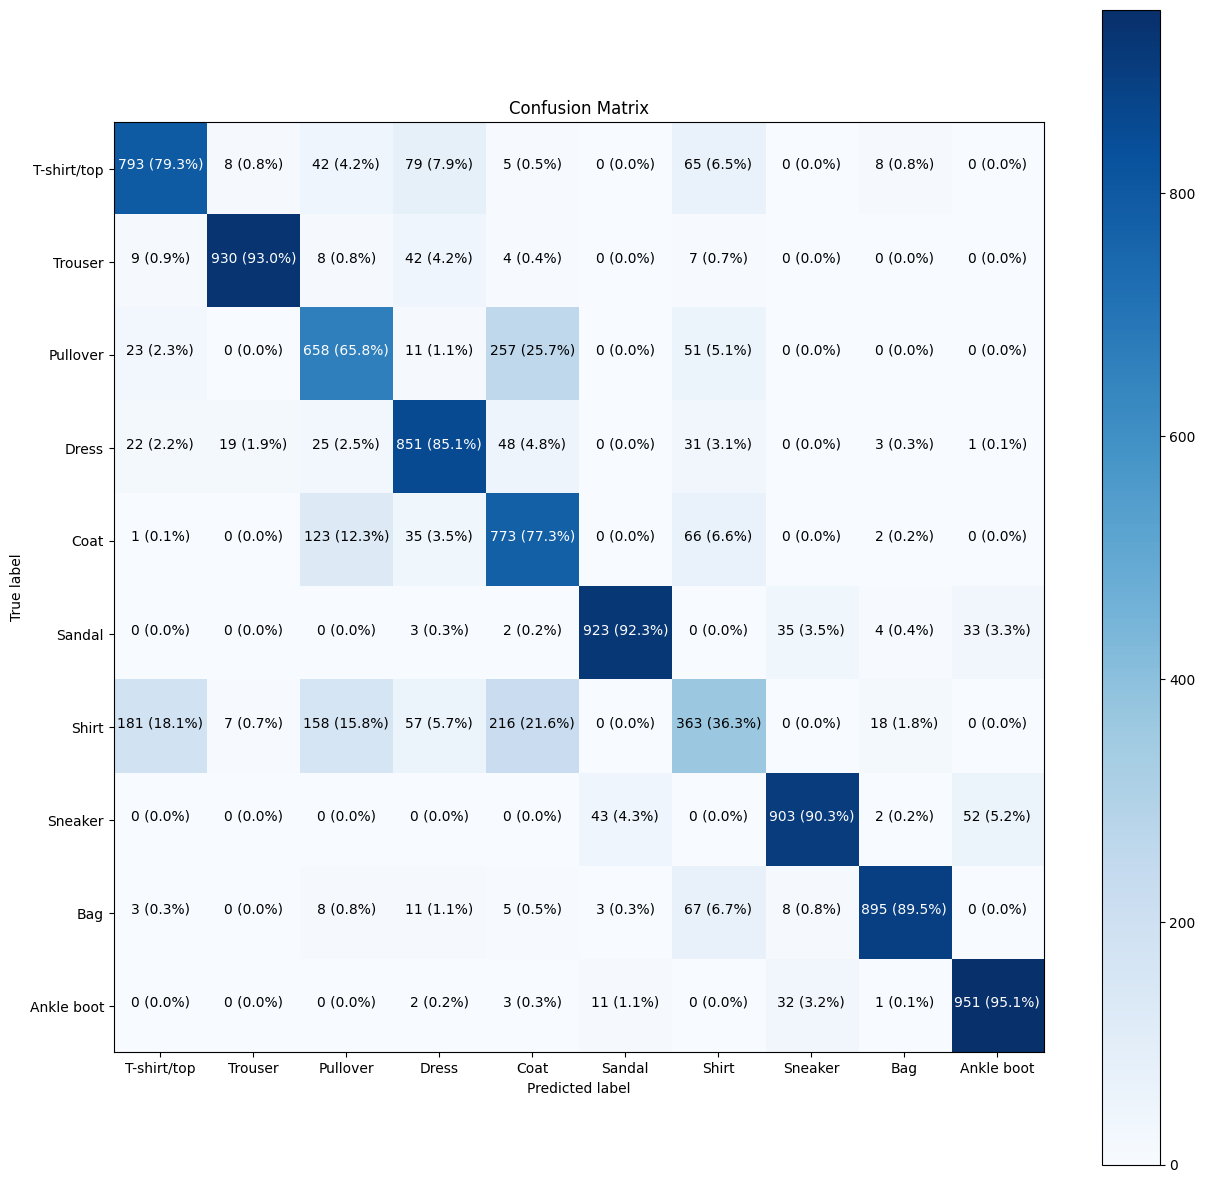

In [101]:
# use the custom function
make_confusion_matrix(y_true=test_labels, # ground truth test labels
                      y_pred=y_preds, # predicted labels
                      classes=class_names, # array of class label names
                      figsize=(15, 15),
                      text_size=10)

In [102]:
# Visualize random images along with its predictions
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

    Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
    """
    # Setup random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # set the color to green or red

1/1 [==============================] - 0s 14ms/step


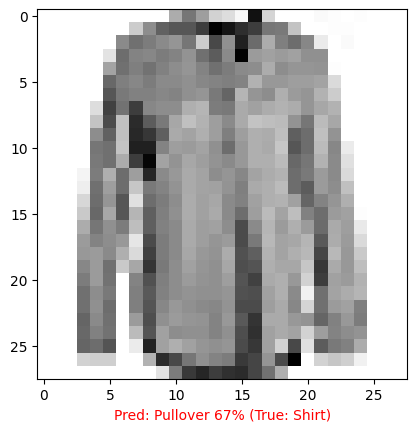

In [120]:
# Check a random image as well as its prediction
plot_random_image(
    model=model_14,
    images=test_data,
    true_labels=test_labels,
    classes=class_names
)

### 打开模型的黑箱

In [121]:
# Find the layers of our most recent model
model_14.layers

In [122]:
model_14.layers[1]

In [124]:
# use get_weights() method to return the weights and biases of a particular layer
weights, biases = model_14.layers[1].get_weights()
weights, weights.shape, biases, biases.shape

(array([[-0.90567976,  0.297178  ,  0.04594129,  0.38562384],
        [-0.34500587,  0.8448008 , -0.6258098 ,  0.9006831 ],
        [-0.7410804 ,  0.24961439, -0.67871034,  0.24657834],
        ...,
        [-0.2979967 ,  0.5882695 ,  0.42336908,  0.5044952 ],
        [-0.48218536, -0.51390404,  0.50987846,  1.1357784 ],
        [-0.46406153,  0.6115229 , -0.18753593,  0.5939081 ]],
       dtype=float32),
 (784, 4),
 array([1.7516812, 2.7224708, 1.8496165, 1.8945491], dtype=float32),
 (4,))

In [125]:
model_14.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 4)                 3140      
                                                                 
 dense_58 (Dense)            (None, 4)                 20        
                                                                 
 dense_59 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 权重中的每个值对应于输入数据的每个值如何影响模型的最后决策
* 权重的初始化是靠kernel_initializer，default:glorot_uniform
* 偏置向量指示了相应权重矩阵应影响下一层的程度
* 偏置的初始化是靠bias_initializer，一开始为0
* 每一层的输出都是下一层的输入，通过plot_model()

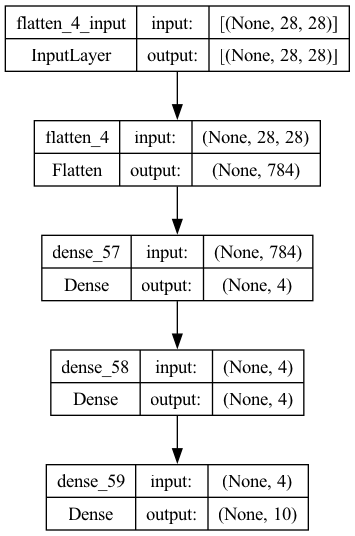

In [126]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)

其他关于神经网络的关键词
反向传播
梯度下降